# Neural Network Classification with PyTorch

## 1. Make classification data and get it ready

In [1]:
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(
	n_samples,
	noise=0.03,
	random_state=42
)

In [2]:
len( X), len( y)

(1000, 1000)

In [3]:
print( f"First 5 samples of X:\n{ X[ :5]}")
print( f"First 5 samples of y:\n{ y[ :5]}")

First 5 samples of X:
[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y:
[1 1 1 1 0]


In [4]:
# Make DataFrame of circle data
import pandas as pd
circles = pd.DataFrame( {
	"X1": X[:, 0],
	"X2": X[:, 1],
	"label": y
})

circles.head( 10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


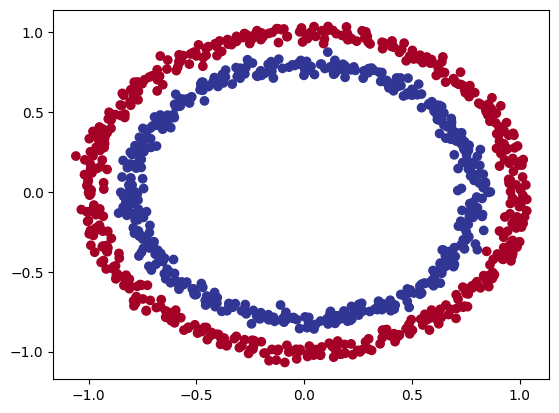

In [5]:
# Visualize
import matplotlib.pyplot as plt

plt.scatter(
	x=X[:, 0],
	y=X[:, 1],
	c=y,
	cmap=plt.cm.RdYlBu
)

### 1.1 Check input and output shapes

In [6]:
X.shape, y.shape

((1000, 2), (1000,))

In [7]:
# View the first sample example of features and labels

X_sample = X[ 0]
y_sample = y[ 0]

print( f"values for one sample of X: { X_sample} and the same for y: { y_sample}")
print( f"shapes for one sample of X: { X_sample.shape} and the same for y: { y_sample.shape}")

values for one sample of X: [0.75424625 0.23148074] and the same for y: 1
shapes for one sample of X: (2,) and the same for y: ()


### 1.2 Turn data into tensors and create train and test splits

In [8]:
import torch
torch.__version__

'2.2.2+cu121'

In [9]:
type( X)

numpy.ndarray

In [10]:
X = torch.from_numpy( X).type( torch.float)
y = torch.from_numpy( y).type( torch.float)

In [11]:
X.dtype, y.dtype

(torch.float32, torch.float32)

In [12]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [13]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([800, 2]),
 torch.Size([200, 2]),
 torch.Size([800]),
 torch.Size([200]))

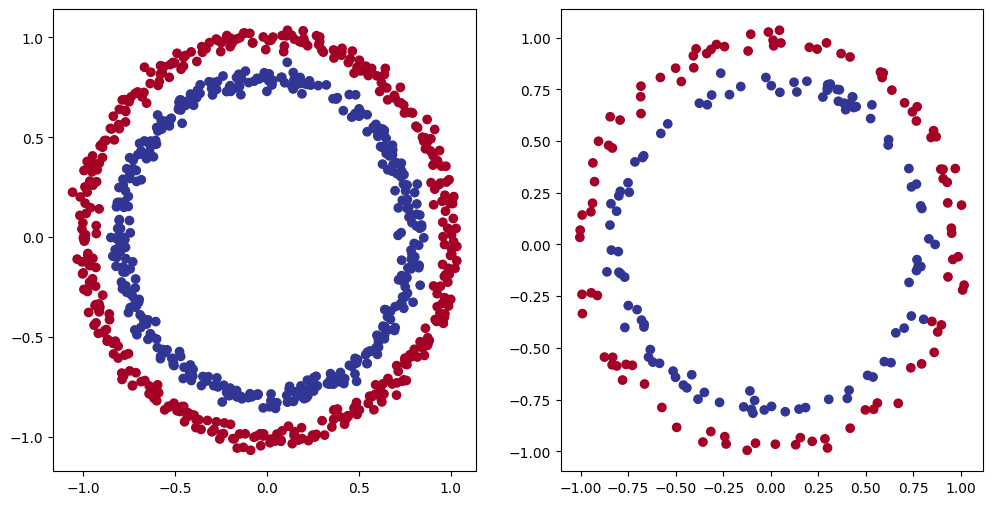

In [14]:
fig, ax = plt.subplots( nrows=1, ncols=2, figsize=( 12, 6))

ax[ 0].scatter(
	x=X_train.numpy()[:, 0],
	y=X_train.numpy()[:, 1],
	c=y_train.numpy(),
	cmap=plt.cm.RdYlBu
)

ax[ 1].scatter(
	x=X_test.numpy()[:, 0],
	y=X_test.numpy()[:, 1],
	c=y_test.numpy(),
	cmap=plt.cm.RdYlBu
)

## 2. Building a model

To Do:
1. Setup device agonistic code
2. Construct a mode
3. Define a loss function and optimizer
4. Create a training and test loop

In [15]:
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"

device

'cuda'

In [16]:
X_train = X_train.to( device)
y_train = y_train.to( device)

X_test = X_test.to( device)
y_test = y_test.to( device)

### Create a model

1. subclass `nn.Module`
2. create 2 `nn.Linear()` layers
3. defines a `forward()` method
4. instantiate an instance of our model

In [17]:
class CircleModelV0( nn.Module):
	def __init__( self):
		super().__init__()

		self.layer_1 = nn.Linear( in_features=2, out_features=5)
		self.layer_2 = nn.Linear( in_features=5, out_features=1)

		# self.two_linear_layers = nn.Sequential(
		# 	self.layer_1,
		# 	self.layer_2
		# )

	def forward( self, x):
		return self.layer_2( self.layer_1( x))	# x -> layer_1 -> layer_2
		# return self.two_linear_layers( x)
	
model_0 = CircleModelV0().to( device)

model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [18]:
next( model_0.parameters())

Parameter containing:
tensor([[ 0.2088, -0.3739],
        [ 0.3737,  0.3992],
        [-0.4932, -0.3835],
        [ 0.1729, -0.5576],
        [-0.4730, -0.5547]], device='cuda:0', requires_grad=True)

In [19]:
model_0.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.2088, -0.3739],
                      [ 0.3737,  0.3992],
                      [-0.4932, -0.3835],
                      [ 0.1729, -0.5576],
                      [-0.4730, -0.5547]], device='cuda:0')),
             ('layer_1.bias',
              tensor([-0.2618, -0.1391,  0.1943,  0.3273,  0.1291], device='cuda:0')),
             ('layer_2.weight',
              tensor([[ 0.0455, -0.0799,  0.1017, -0.4291, -0.0867]], device='cuda:0')),
             ('layer_2.bias', tensor([-0.3832], device='cuda:0'))])

In [20]:
# Make predictions

with torch.inference_mode():
	untrained_preds = model_0( X_test)

print( f"Length of predictions: { len( untrained_preds)}, shape: { untrained_preds.shape}")
print( f"Length of test samples: { len( X_test)}, shape: { X_test.shape}")
print( f"First 10 predictions:\n{ torch.round( untrained_preds[ :10])}")
print( f"First 10 labels:\n{ y_test[ :10]}")

Length of predictions: 200, shape: torch.Size([200, 1])
Length of test samples: 200, shape: torch.Size([200, 2])
First 10 predictions:
tensor([[-0.],
        [-0.],
        [-1.],
        [-0.],
        [-1.],
        [-1.],
        [-0.],
        [-1.],
        [-0.],
        [-0.]], device='cuda:0')
First 10 labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0')


### Setup loss function and optimizer

In [21]:
# setup loss function
loss_fn = nn.BCEWithLogitsLoss()

# setup optimizer
optimizer = torch.optim.SGD( params=model_0.parameters(), lr=0.1)

In [22]:
# calculate accuracy
def accuracy_fn( y_true, y_pred):
	correct = torch.eq( y_true, y_pred).sum().item()
	acc = ( correct / len( y_pred)) * 100
	return acc

## 3. Train model

### raw logits -> prediction probabilities -> prediction labels

In [23]:
model_0.eval()
with torch.inference_mode():
	y_logits = model_0( X_test)[ :5]

y_logits

tensor([[-0.3408],
        [-0.3260],
        [-0.5057],
        [-0.2935],
        [-0.7059]], device='cuda:0')

In [24]:
# use the sigmoid activation function on our model logits to turn them into prediction probabilities
y_pred_probs = torch.sigmoid( y_logits)

y_pred_probs

tensor([[0.4156],
        [0.4192],
        [0.3762],
        [0.4271],
        [0.3305]], device='cuda:0')

In [25]:
torch.round( y_pred_probs)

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.]], device='cuda:0')

In [26]:
# Find the predicted labels
model_0.eval()
with torch.inference_mode():
	y_preds_labels = torch.round( torch.sigmoid( model_0( X_test)[ :5]))

### building a training loop

In [27]:
torch.manual_seed( 42)
torch.cuda.manual_seed( 42)

epochs = 100

for epoch in range( epochs):
	
	### training
	model_0.train()

	# 1. forward pass
	y_logits = model_0( X_train).squeeze()
	y_pred = torch.round( torch.sigmoid( y_logits))

	# 2. calculate loss/accuracy
	loss = loss_fn( y_logits, y_train)	# nn.BCEWithLogitsLoss expects raw logits as input
	acc = accuracy_fn( y_train, y_pred)

	# 3. optimizer zero grad
	optimizer.zero_grad()

	# 4. loss backward (backpropagation)
	loss.backward()

	# 5. optimizer step (gradient descent)
	optimizer.step()

	### Testing
	model_0.eval()

	with torch.inference_mode():
		# 1. forward pass
		test_logits = model_0( X_test).squeeze()
		test_pred = torch.round( torch.sigmoid( test_logits))

		# 2. calculate test loss/accuracy
		test_loss = loss_fn( test_logits, y_test)
		test_accuracy = accuracy_fn( y_test, test_pred)

	if epoch % 10 == 0:
		print( f"Epoch: { epoch} | Loss: { loss:.5f}, Acc: { acc:.2f}% | Test Loss: { test_loss:.5f} | Test Acc: { test_accuracy:.2f}%")

Epoch: 0 | Loss: 0.72808, Acc: 50.00% | Test Loss: 0.72750 | Test Acc: 50.00%
Epoch: 10 | Loss: 0.71087, Acc: 50.00% | Test Loss: 0.71108 | Test Acc: 50.00%
Epoch: 20 | Loss: 0.70264, Acc: 50.00% | Test Loss: 0.70307 | Test Acc: 50.00%
Epoch: 30 | Loss: 0.69859, Acc: 49.38% | Test Loss: 0.69907 | Test Acc: 48.50%
Epoch: 40 | Loss: 0.69653, Acc: 43.75% | Test Loss: 0.69702 | Test Acc: 42.00%
Epoch: 50 | Loss: 0.69543, Acc: 48.38% | Test Loss: 0.69596 | Test Acc: 43.50%
Epoch: 60 | Loss: 0.69482, Acc: 48.75% | Test Loss: 0.69540 | Test Acc: 45.00%
Epoch: 70 | Loss: 0.69445, Acc: 49.50% | Test Loss: 0.69510 | Test Acc: 46.00%
Epoch: 80 | Loss: 0.69421, Acc: 49.75% | Test Loss: 0.69495 | Test Acc: 46.00%
Epoch: 90 | Loss: 0.69404, Acc: 49.75% | Test Loss: 0.69487 | Test Acc: 48.00%


## 4. Make prediction and evaluate the model

In [28]:
import requests
from pathlib import Path

name = "helper_functions.py"

# Download helper function from Learn PyTorch repo
if Path( name).is_file():
	print( f"{ name} already exists, skipping download")
else:
	print( f"Downloading { name}")
	request = requests.get( "https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")

	with open( name, "wb") as f:
		f.write( request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


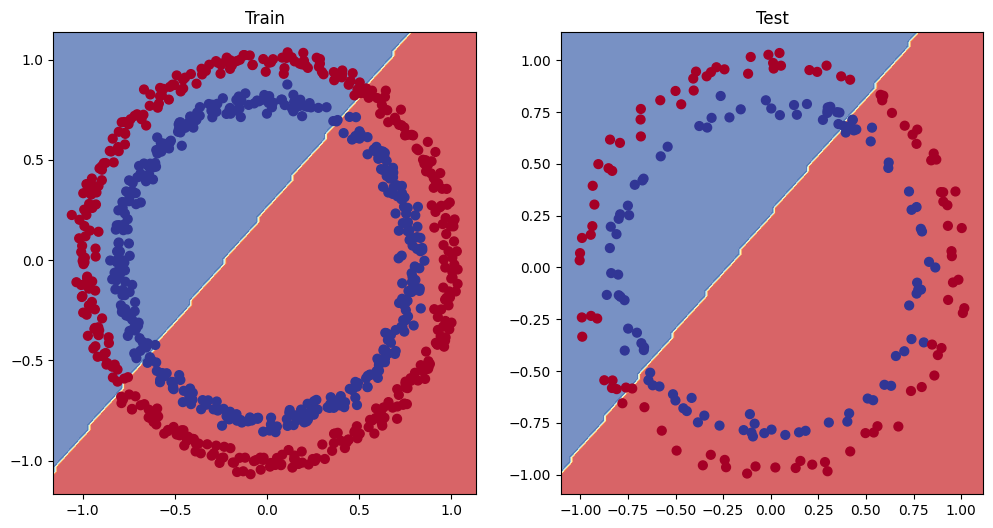

In [29]:
# plot decision boundary of the model
plt.figure( figsize=( 12, 6))

plt.subplot( 1, 2, 1)
plt.title( "Train")
plot_decision_boundary( model_0, X_train, y_train)

plt.subplot( 1, 2, 2)
plt.title( "Test")
plot_decision_boundary( model_0, X_test, y_test)

## 5. Checking model validity

In [30]:
class CircleModelV1( nn.Module):
	def __init__( self):
		super().__init__()

		self.layer_1 = nn.Linear( in_features=2, out_features=10)
		self.layer_2 = nn.Linear( in_features=10, out_features=10)
		self.layer_3 = nn.Linear( in_features=10, out_features=1)

	def forward( self, x):
		z = self.layer_1( x)
		z = self.layer_2( z)
		z = self.layer_3( z)
		return z
	
model_1 = CircleModelV1().to( device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [31]:
model_1.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]], device='cuda:0')),
             ('layer_1.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984], device='cuda:0')),
             ('layer_2.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0.3130, -0.122

In [32]:
# Create a loss function
loss_fn = nn.BCEWithLogitsLoss()

# Create an optimizer
optimizer = torch.optim.SGD( params=model_1.parameters(), lr=0.1)

In [33]:
torch.manual_seed( 42)
torch.cuda.manual_seed( 42)

epochs = 1000

for epoch in range( epochs):
	
	### Training
	model_1.train()

	# 1. Forward pass
	y_logits = model_1( X_train).squeeze()
	y_pred = torch.round( torch.sigmoid( y_logits))

	# 2. Calculate the loss/acc
	loss = loss_fn( y_logits, y_train)
	acc = accuracy_fn( y_train, y_pred)

	# 3. Optimizer zero grad
	optimizer.zero_grad()

	# 4. Loss backward (backpropagation)
	loss.backward()

	# 5. Optimizer step (gradient descent)
	optimizer.step()

	### Testing
	model_1.eval()
	with torch.inference_mode():
		# 1. Forward Pass
		test_logits = model_1( X_test).squeeze()
		test_pred = torch.round( torch.sigmoid( test_logits))

		# 2. Calculate loss/acc
		test_loss = loss_fn( test_logits, y_test)
		test_acc = accuracy_fn( y_test, test_pred)

	if epoch % 100 == 0:
		print( f"Epoch: { epoch} | Loss: { loss:.5f}, Acc: { acc:.2f} | Test Loss: { test_loss:.5f}, Test Acc: { test_acc:.2f}")


Epoch: 0 | Loss: 0.69396, Acc: 50.88 | Test Loss: 0.69261, Test Acc: 51.00
Epoch: 100 | Loss: 0.69305, Acc: 50.38 | Test Loss: 0.69379, Test Acc: 48.00
Epoch: 200 | Loss: 0.69299, Acc: 51.12 | Test Loss: 0.69437, Test Acc: 46.00
Epoch: 300 | Loss: 0.69298, Acc: 51.62 | Test Loss: 0.69458, Test Acc: 45.00
Epoch: 400 | Loss: 0.69298, Acc: 51.12 | Test Loss: 0.69465, Test Acc: 46.00
Epoch: 500 | Loss: 0.69298, Acc: 51.00 | Test Loss: 0.69467, Test Acc: 46.00
Epoch: 600 | Loss: 0.69298, Acc: 51.00 | Test Loss: 0.69468, Test Acc: 46.00
Epoch: 700 | Loss: 0.69298, Acc: 51.00 | Test Loss: 0.69468, Test Acc: 46.00
Epoch: 800 | Loss: 0.69298, Acc: 51.00 | Test Loss: 0.69468, Test Acc: 46.00
Epoch: 900 | Loss: 0.69298, Acc: 51.00 | Test Loss: 0.69468, Test Acc: 46.00


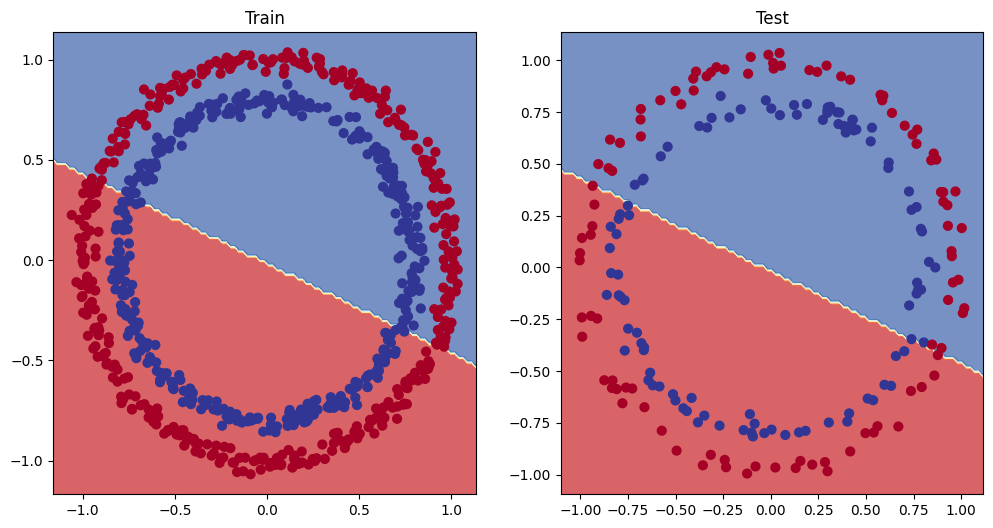

In [34]:
# Plot the decision boundary

# plot decision boundary of the model
plt.figure( figsize=( 12, 6))

plt.subplot( 1, 2, 1)
plt.title( "Train")
plot_decision_boundary( model_1, X_train, y_train)

plt.subplot( 1, 2, 2)
plt.title( "Test")
plot_decision_boundary( model_1, X_test, y_test)

### Preparing data to see if our model can fit a straight line

In [35]:
# Create some data
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

X_regression = torch.arange( start, end, step).unsqueeze( dim=1)
y_regression = weight * X_regression + bias

print( len( X_regression))
X_regression[ :5], y_regression[ :5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [36]:
# Create train and test splits
train_splits = int( 0.8 * len( X_regression))

X_train_regression, y_train_regression = X_regression[ :train_splits], y_regression[ :train_splits]
X_test_regression, y_test_regression = X_regression[ train_splits:], y_regression[ train_splits:]

len( X_train_regression), len( y_train_regression), len( X_test_regression), len( y_test_regression)

(80, 80, 20, 20)

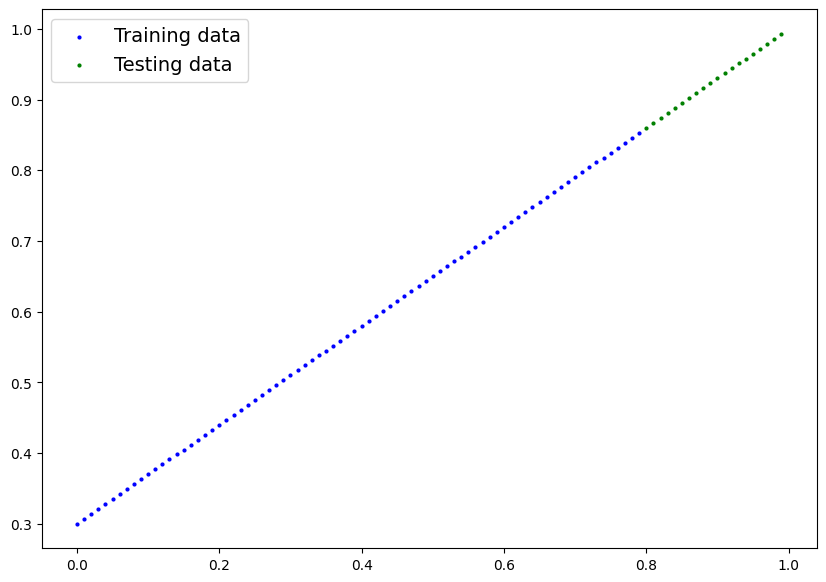

In [37]:
plot_predictions(
	train_data=X_train_regression,
	train_labels=y_train_regression,
	test_data=X_test_regression,
	test_labels=y_test_regression
)

In [38]:
# Adjust model_1
model_2 = nn.Sequential(
	nn.Linear( in_features=1, out_features=10),
	nn.Linear( in_features=10, out_features=10),
	nn.Linear( in_features=10, out_features=1)
).to( device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [39]:
# Loss and Optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD( params=model_2.parameters(), lr=0.01)

In [40]:
torch.manual_seed( 42)
torch.cuda.manual_seed( 42)

epochs = 1000

X_train_regression, y_train_regression = X_train_regression.to( device), y_train_regression.to( device)
X_test_regression, y_test_regression = X_test_regression.to( device), y_test_regression.to( device)

for epoch in range( epochs):
	y_pred = model_2( X_train_regression)
	loss = loss_fn( y_pred, y_train_regression)
	optimizer.zero_grad()
	loss.backward()
	optimizer.step()

	model_2.eval()
	with torch.inference_mode():
		test_pred = model_2( X_test_regression)
		test_loss = loss_fn( test_pred, y_test_regression)

	if epoch % 100 == 0:
		print( f"Epoch: { epoch} | Loss: { loss:.5f} | Test Loss: { test_loss:.5f}")

Epoch: 0 | Loss: 0.75986 | Test Loss: 0.91103
Epoch: 100 | Loss: 0.02858 | Test Loss: 0.00081
Epoch: 200 | Loss: 0.02533 | Test Loss: 0.00209
Epoch: 300 | Loss: 0.02137 | Test Loss: 0.00305
Epoch: 400 | Loss: 0.01964 | Test Loss: 0.00341
Epoch: 500 | Loss: 0.01940 | Test Loss: 0.00387
Epoch: 600 | Loss: 0.01903 | Test Loss: 0.00379
Epoch: 700 | Loss: 0.01878 | Test Loss: 0.00381
Epoch: 800 | Loss: 0.01840 | Test Loss: 0.00329
Epoch: 900 | Loss: 0.01798 | Test Loss: 0.00360


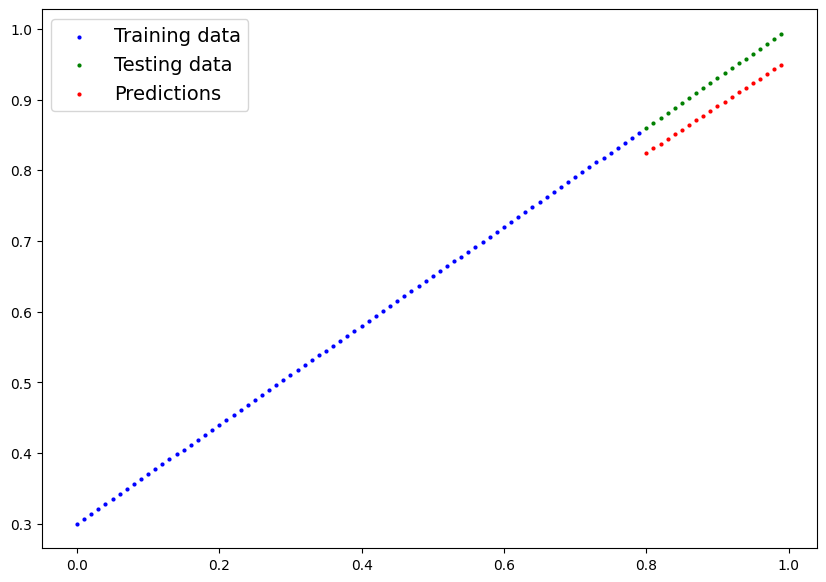

In [41]:
model_2.eval()

with torch.inference_mode():
	y_preds = model_2( X_test_regression)

plot_predictions(
	train_data=X_train_regression.cpu(),
	train_labels=y_train_regression.cpu(),
	test_data=X_test_regression.cpu(),
	test_labels=y_test_regression.cpu(),
	predictions=y_preds.cpu()
)

## 6. The missing piece: non-linearity

### 6.1 Recreate non-linear data

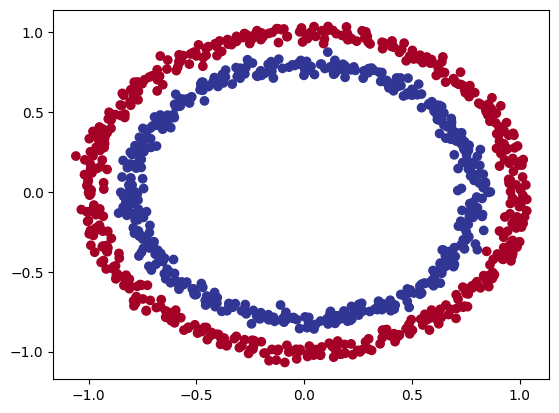

In [42]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles( n_samples, noise=0.03, random_state=42)

plt.scatter( X[ :, 0], X[ :, 1], c=y, cmap=plt.cm.RdYlBu)
plt.show()

In [43]:
# Convert data to tensors and then to train and test splits
import torch
from sklearn.model_selection import train_test_split

X = torch.from_numpy( X).type( torch.float)
y = torch.from_numpy( y).type( torch.float)

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

X_train[ :5], y_train[ :5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

### 6.2 Building a model with non-linearity

In [44]:
from torch import nn

class CircleModelV2( nn.Module):
	def __init__( self):
		super().__init__()

		self.layer_1 = nn.Linear( in_features=2, out_features=10)
		self.layer_2 = nn.Linear( in_features=10, out_features=10)
		self.layer_3 = nn.Linear( in_features=10, out_features=1)
		self.relu = nn.ReLU()

	def forward( self, x):
		return self.layer_3(
					self.relu(
						self.layer_2(
							self.relu(
								self.layer_1( x)
							)
						)
					)
				)

model_3 = CircleModelV2().to( device)

model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [45]:
# Setup loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD( model_3.parameters(), lr=0.1)

### 6.3 Training the model

In [46]:
# Training Loop

torch.manual_seed( 42)
torch.cuda.manual_seed( 42)

X_train, y_train = X_train.to( device), y_train.to( device)
X_test, y_test = X_test.to( device), y_test.to( device)

epochs = 1000

for epoch in range( epochs):
	### Training
	model_3.train()

	# 1. Forward pass
	y_logits = model_3( X_train).squeeze()
	y_pred = torch.round( torch.sigmoid( y_logits))

	# 2. Calculate the loss/acc
	loss = loss_fn( y_logits, y_train)
	acc = accuracy_fn( y_train, y_pred)

	# 3. Optimizer zero grad
	optimizer.zero_grad()

	# 4. Loss backward
	loss.backward()

	# 5. step the optimizer
	optimizer.step()

	### Testing
	model_3.eval()

	with torch.inference_mode():
		# 1. Forward pass
		test_logits = model_3( X_test).squeeze()
		test_pred = torch.round( torch.sigmoid( test_logits))

		# 2. Calculate the loss/acc
		test_loss = loss_fn( test_logits, y_test)
		test_acc = accuracy_fn( y_test, test_pred)

	if epoch % 100 == 0:
		print( f"Epoch: { epoch} | Loss: { loss:.4f}, Acc: { acc:.2f} | Test Loss: { test_loss:.4f}, Test Acc: { test_acc:.2f}")

Epoch: 0 | Loss: 0.6929, Acc: 50.00 | Test Loss: 0.6932, Test Acc: 50.00
Epoch: 100 | Loss: 0.6912, Acc: 52.88 | Test Loss: 0.6910, Test Acc: 52.50
Epoch: 200 | Loss: 0.6898, Acc: 53.37 | Test Loss: 0.6894, Test Acc: 55.00
Epoch: 300 | Loss: 0.6879, Acc: 53.00 | Test Loss: 0.6872, Test Acc: 56.00
Epoch: 400 | Loss: 0.6852, Acc: 52.75 | Test Loss: 0.6841, Test Acc: 56.50
Epoch: 500 | Loss: 0.6810, Acc: 52.75 | Test Loss: 0.6794, Test Acc: 56.50
Epoch: 600 | Loss: 0.6751, Acc: 54.50 | Test Loss: 0.6729, Test Acc: 56.00
Epoch: 700 | Loss: 0.6666, Acc: 58.38 | Test Loss: 0.6632, Test Acc: 59.00
Epoch: 800 | Loss: 0.6516, Acc: 64.00 | Test Loss: 0.6476, Test Acc: 67.50
Epoch: 900 | Loss: 0.6236, Acc: 74.00 | Test Loss: 0.6215, Test Acc: 79.00


### 6.4 Evaluating the model

In [47]:
model_3.eval()

with torch.inference_mode():
	y_logits = model_3( X_test).squeeze()
	y_preds = torch.round( torch.sigmoid( y_logits))

y_preds[ :10], y_test[ :10]

(tensor([1., 0., 1., 0., 0., 1., 0., 0., 1., 0.], device='cuda:0'),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'))

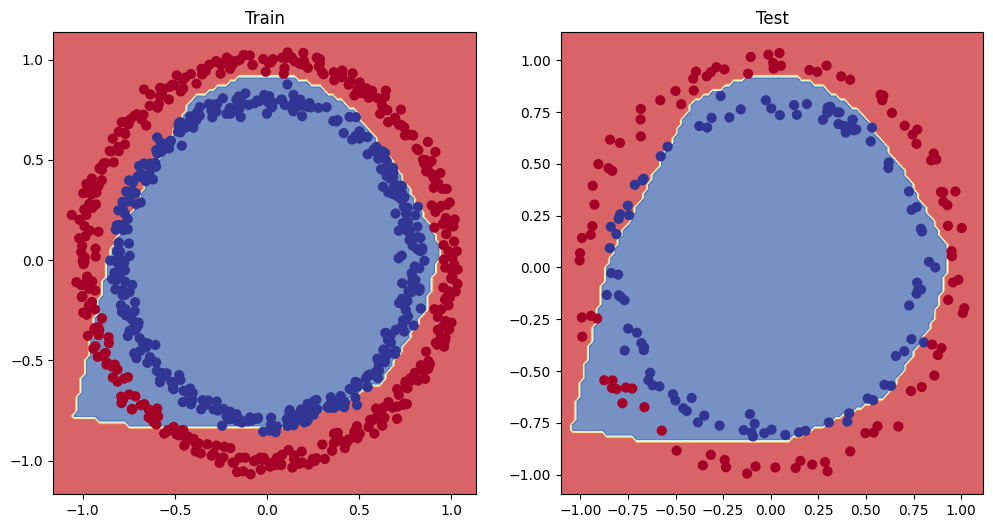

In [48]:
# plot decision boundaries

plt.figure( figsize=( 12, 6))

plt.subplot( 1, 2, 1)
plt.title( "Train")
plot_decision_boundary( model_3, X_train, y_train)

plt.subplot( 1, 2, 2)
plt.title( "Test")
plot_decision_boundary( model_3, X_test, y_test)

## 7. Replicating non-linear activation functions

In [49]:
# Create a tensor
A = torch.arange( -10, 10, 1, dtype=torch.float32)

A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

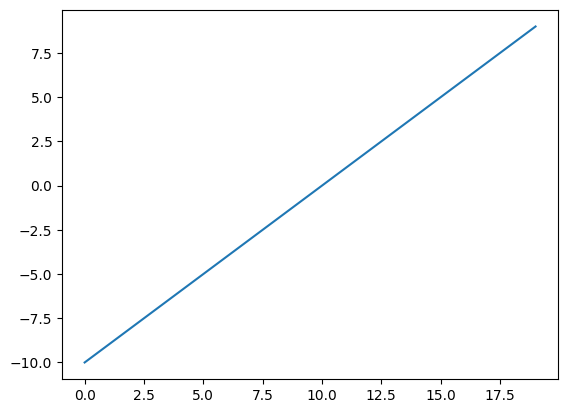

In [50]:
plt.plot( A)

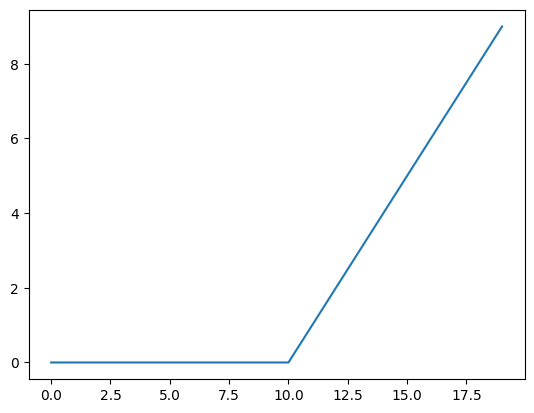

In [51]:
plt.plot( torch.relu( A))

In [52]:
def relu( x: torch.Tensor) -> torch.Tensor:
	return torch.maximum( torch.tensor( 0), x)

In [53]:
relu( A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

In [54]:
def sigmoid( x):
	return 1 / ( 1 + torch.exp( -x))

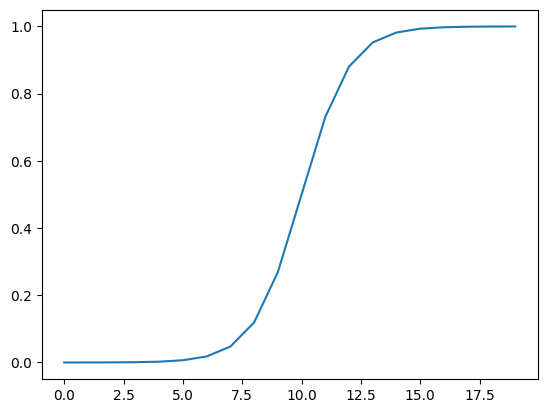

In [56]:
plt.plot( torch.sigmoid( A))

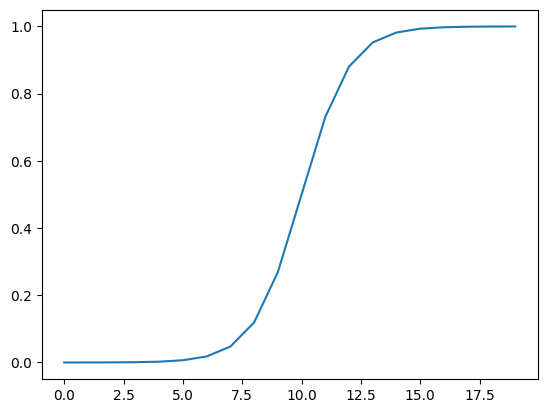

In [55]:
plt.plot( sigmoid( A))